<a href="https://colab.research.google.com/github/Wina30/Machine_Learning/blob/main/Dicoding_RockPaperScissors_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA DIRI**
---
<pre>
Nama     : Adamas Wina Kesuma
Username : adamaswina
Email    : adamaskesuma4@gmail.com
Domisili : Bandung, Jawa Barat
</pre>


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-08 17:25:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.14MB/s    in 68s     

2021-07-08 17:27:01 (4.50 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# extracting zip file
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images',
 'rock',
 'paper',
 'val',
 'README_rpc-cv-images.txt',
 'scissors',
 'train']

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [ ]:
# directory name
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
# validation and train directory
os.mkdir(train_dir)
os.mkdir(validation_dir)

FileExistsError: ignored

In [ ]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# splitting rock directory become data train and data valid
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

# splitting paper directory become data train and data valid
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

# splitting scissors directory become data train and data valid
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)


NameError: ignored

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# making new directory in train and valid directory
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:
# copying train and valid data on new directory
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

569

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

143

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

580

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

146

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

600

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

150

In [ ]:
# image data generator
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
# modelling
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 48s - loss: 1.1626 - accuracy: 0.4075 - val_loss: 0.9818 - val_accuracy: 0.6625
Epoch 2/20
25/25 - 47s - loss: 0.6900 - accuracy: 0.7237 - val_loss: 0.4713 - val_accuracy: 0.8625
Epoch 3/20
25/25 - 47s - loss: 0.4044 - accuracy: 0.8475 - val_loss: 0.2675 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 49s - loss: 0.3047 - accuracy: 0.8988 - val_loss: 0.2352 - val_accuracy: 0.9187
Epoch 5/20
25/25 - 47s - loss: 0.2598 - accuracy: 0.9175 - val_loss: 0.2129 - val_accuracy: 0.9125
Epoch 6/20
25/25 - 46s - loss: 0.2442 - accuracy: 0.9162 - val_loss: 0.2988 - val_accuracy: 0.8938
Epoch 7/20
25/25 - 46s - loss: 0.1788 - accuracy: 0.9493 - val_loss: 0.1673 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 46s - loss: 0.1872 - accuracy: 0.9354 - val_loss: 0.1896 - val_accuracy: 0.9312
Epoch 9/20
25/25 - 46s - loss: 0.1591 - accuracy: 0.9538 - val_loss: 0.1444 - val_accuracy: 0.9250
Epoch 10/20
25/25 - 46s - loss: 0.1416 - accuracy: 0.9513 - val_loss: 0.2302 - val_accuracy: 0.9187
Epoch 11/

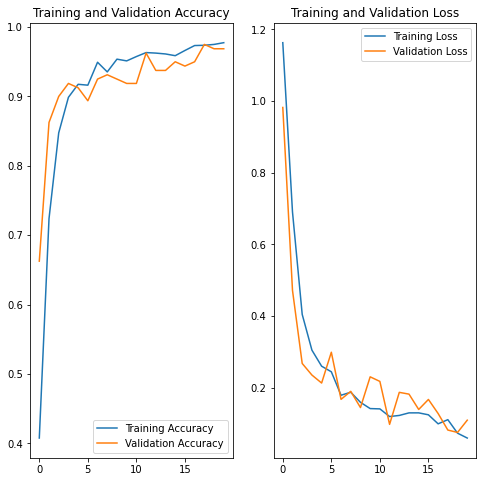

In [ ]:
# visualizing train data 

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 1 P5M1L5RCIS2FNShm-jA9ng.png to 1 P5M1L5RCIS2FNShm-jA9ng (1).png
1 P5M1L5RCIS2FNShm-jA9ng.png
this machine detection are scissors handsign


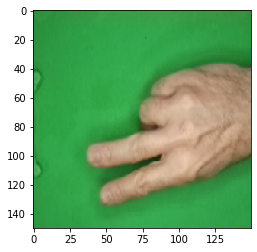

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('this machine detection are paper handsign')
  elif classes[0,1]!=0:
    print('this machine detection are rock handsign')
  else:
    print('this machine detection are scissors handsign')